In [1]:
import numpy as np
import time
from function import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
sns.set()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(df.iloc[:, 1:-1]))
Y = LabelEncoder().fit_transform(df.iloc[:, -1])

In [4]:
hidden_size = 20
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
learning_rate = 0.005

W1 = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1])
W1_g = np.zeros(W1.shape)
W1_g2 = np.zeros(W1.shape)
b1 = np.zeros((1, X.shape[1]))
b1_g = np.zeros(b1.shape)
b1_g2 = np.zeros(b1.shape)
W2 = np.random.randn(X.shape[1], hidden_size) / np.sqrt(X.shape[1])
W2_g = np.zeros(W2.shape)
W2_g2 = np.zeros(W2.shape)
b2 = np.zeros((1, hidden_size))
b2_g = np.zeros(b2.shape)
b2_g2 = np.zeros(b2.shape)
W3 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
W3_g = np.zeros(W3.shape)
W3_g2 = np.zeros(W3.shape)
b3 = np.zeros((1, 3))
b3_g = np.zeros(b3.shape)
b3_g2 = np.zeros(b3.shape)

In [5]:
def predict(inputs):
    z1 = inputs * W1 + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [6]:
def training(epoch):
    global W1,b1,W2,b2,W3,b3,W1_g,W1_g2,b1_g,b1_g2,W2_g,W2_g2,b2_g,b2_g2,W3_g,W3_g2,b3_g,b3_g2
    z1 = X * W1 + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    accuracy = np.mean(np.argmax(probs,axis=1) == Y)
    delta4 = probs
    delta4[range(X.shape[0]), Y] -= 1
    dW3 = (a2.T).dot(delta4)
    db3 = np.sum(delta4, axis=0, keepdims=True)
    delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.mean(np.dot(X.T, delta2),axis=0)
    db1 = np.sum(delta2, axis=0)
    
    W1_g += beta1 * W1_g + (1-beta1) * dW1
    g_hat = W1_g  / (1-beta1)
    W1_g2 += beta2 * W1_g2 + (1-beta2) * np.square(dW1)
    g2_hat = W1_g2 / (1-beta2)
    W1 += -learning_rate * g_hat / np.sqrt(g2_hat + epsilon)
    
    b1_g += beta1 * b1_g + (1-beta1) * db1
    g_hat = b1_g  / (1-beta1)
    b1_g2 += beta2 * b1_g2 + (1-beta2) * np.square(db1)
    g2_hat = b1_g2 / (1-beta2)
    b1 += -learning_rate * g_hat / np.sqrt(g2_hat + epsilon)
    
    W2_g += beta1 * W2_g + (1-beta1) * dW2
    g_hat = W2_g  / (1-beta1)
    W2_g2 += beta2 * W2_g2 + (1-beta2) * np.square(dW2)
    g2_hat = W2_g2 / (1-beta2)
    W2 += -learning_rate * g_hat / np.sqrt(g2_hat + epsilon)
    
    b2_g += beta1 * b2_g + (1-beta1) * db2
    g_hat = b2_g / (1-beta1)
    b2_g2 += beta2 * b2_g2 + (1-beta2) * np.square(db2)
    g2_hat = b2_g2 / (1-beta2)
    b2 += -learning_rate * g_hat / np.sqrt(g2_hat + epsilon)
    
    W3_g += beta1 * W3_g + (1-beta1) * dW3
    g_hat = W3_g  / (1-beta1)
    W3_g2 += beta2 * W3_g2 + (1-beta2) * np.square(dW3)
    g2_hat = W3_g2 / (1-beta2)
    W3 += -learning_rate * g_hat / np.sqrt(g2_hat + epsilon)
    
    b3_g += beta1 * b3_g + (1-beta1) * db3
    g_hat = b3_g  / (1-beta1)
    b3_g2 += beta2 * b3_g2 + (1-beta2) * np.square(db3)
    g2_hat = b3_g2 / (1-beta2)
    b3 += -learning_rate * g_hat / np.sqrt(g2_hat + epsilon)
    
    Z = np.argmax(predict(np.c_[xx.ravel(), yy.ravel()]),axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    cont = plt.title('ADAM Gradient Descent decision boundary, epoch %d, accuracy: %f'%(epoch+1, accuracy))
    return cont

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


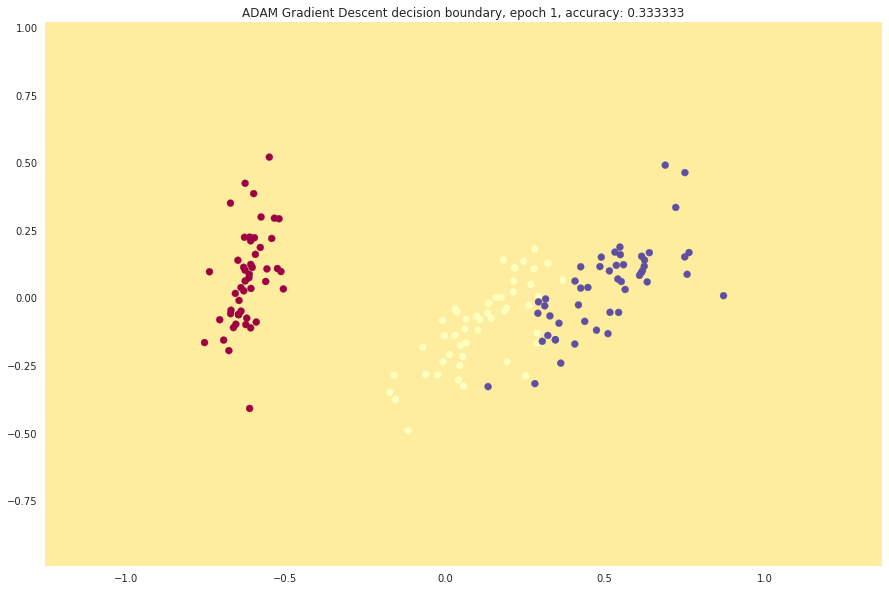

In [7]:
fig = plt.figure(figsize=(15,10))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.argmax(predict(np.c_[xx.ravel(), yy.ravel()]),axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
predicted= np.argmax(predict(X),axis=1)
accuracy = np.mean(Y == predicted)
plt.title('ADAM Gradient Descent decision boundary, epoch %d, accuracy: %f'%(0, accuracy))
anim = animation.FuncAnimation(fig, training, frames=100, interval=200)
anim.save('animation-adam-gradientdescent-iris.gif', writer='imagemagick', fps=5)